In [1]:
import og_gd
import og_fista
import og_ista
import jax_gd
import jax_ista
import jax_ista_sparse
import pytorch_gd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import time

import jax
jax.config.update("jax_platform_name", "cpu")


#import matplotlib
#matplotlib.use("pgf")
#matplotlib.rcParams.update({
#    "pgf.texsystem": "pdflatex",
#    'font.family': 'serif',
#    'text.usetex': True,
#    'pgf.rcfonts': False,
#})

In [13]:
start = time.time()
n_iter = 100
#err_approx, cv_err, runtime = jax_gd.run_sim(250, 20, n_iter=n_iter)
n = 50
p = 150
# prev was 200, 200
#special_lambda = 0.25 * np.sqrt(np.log(p) / n)
special_lambda = 0.1 * np.sqrt(np.log(p) / n)
print(f"special_lambda is {special_lambda}")
err_approx, err_loo, runtime, supports, params = jax_ista_sparse.run_sim(
    n=n, p=p, n_iter=n_iter, lbd_v=special_lambda
)

print(err_approx.keys())
end = time.time()
print(end - start)

special_lambda is 0.031656390489429635
iter: 0 | support size: 150
iter: 1 | support size: 150
iter: 2 | support size: 150
iter: 3 | support size: 150
iter: 4 | support size: 150
iter: 5 | support size: 150
iter: 6 | support size: 150
iter: 7 | support size: 150
iter: 8 | support size: 146
iter: 9 | support size: 149
iter: 10 | support size: 148
iter: 11 | support size: 147
iter: 12 | support size: 142
iter: 13 | support size: 138
iter: 14 | support size: 136
iter: 15 | support size: 131
iter: 16 | support size: 127
iter: 17 | support size: 125
iter: 18 | support size: 125
iter: 19 | support size: 123
iter: 20 | support size: 115
iter: 21 | support size: 112
iter: 22 | support size: 110
iter: 23 | support size: 105
iter: 24 | support size: 95
iter: 25 | support size: 94
iter: 26 | support size: 87
iter: 27 | support size: 82
iter: 28 | support size: 79
iter: 29 | support size: 72
iter: 30 | support size: 66
iter: 31 | support size: 62
iter: 32 | support size: 58
iter: 33 | support size

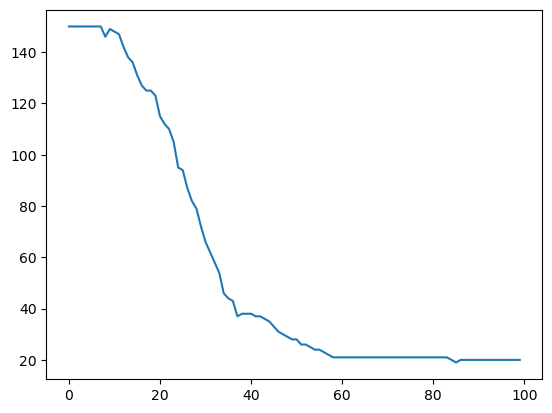

In [14]:
sup_sizes = list(map(len, supports))
plt.plot(sup_sizes)

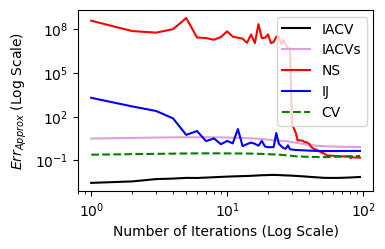

In [15]:
fig, ax = plt.subplots()
start_offset = 5
xx = np.arange(1, n_iter - start_offset + 1)
ax.plot(xx, err_approx['IACV'][start_offset:], c='black', label='IACV')
ax.plot(xx, err_approx['IACV sparse'][start_offset:], c='plum', label='IACVs')
ax.plot(xx, err_approx['NS'][start_offset:], c='red', label='NS')
ax.plot(xx, err_approx['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(xx, err_approx['hat'][start_offset:], c='green', linestyle='dashed', label='CV')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Iterations (Log Scale)')
ax.set_ylabel('$Err_{Approx}$ (Log Scale)')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('sparse_err_approx_150.pgf', bbox_inches='tight', pad_inches=0)

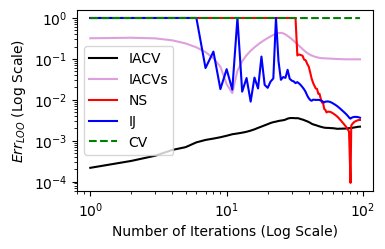

In [16]:
fig, ax = plt.subplots()
start_offset = 5
xx = np.arange(1, n_iter - start_offset + 1)
ax.plot(xx, err_loo['IACV'][start_offset:], c='black', label='IACV')
ax.plot(xx, err_loo['IACV sparse'][start_offset:], c='plum', label='IACVs')
ax.plot(xx, err_loo['NS'][start_offset:], c='red', label='NS')
ax.plot(xx, err_loo['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(xx, err_loo['hat'][start_offset:], c='green', linestyle='dashed', label='CV')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of Iterations (Log Scale)')
ax.set_ylabel('$Err_{LOO}$ (Log Scale)')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('sparse_err_loo.pgf', bbox_inches='tight', pad_inches=0)

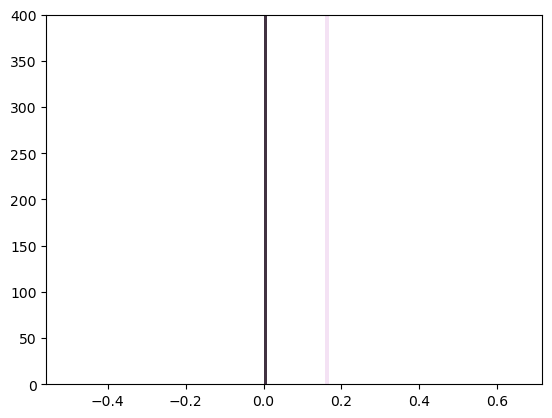

In [6]:
plt.hist(np.asarray(params["true"]).ravel(), bins=100, alpha=0.9, color='black')
plt.hist(params["IACV"].ravel(), bins=100, alpha=0.3, color='magenta')
plt.hist(params["IACV sparse"].ravel(), bins=100, alpha=0.3, color='green')
plt.hist(params["IJ"].ravel(), bins=100, alpha=0.3, color='plum')
plt.ylim(0, 400)
plt.show()

## print(np.mean(np.asarray(params["true"])))
print(np.mean(params["IACV"]))
print(np.mean(params["IJ"]))

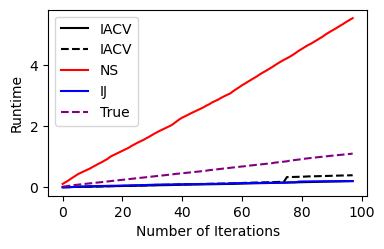

In [17]:
fig, ax = plt.subplots()
start_offset = 2
ax.plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax.plot(runtime['IACV sparse'][start_offset:], c='black', linestyle='dashed', label='IACV')
ax.plot(runtime['NS'][start_offset:], c='red', label='NS')
ax.plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax.plot(runtime['true'][start_offset:], c='purple', label='True', linestyle='dashed')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Runtime')
ax.legend()
ws = 1.45 # 1.75
hs = 1.35 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
plt.tight_layout()
plt.show()
#plt.savefig('true_runtime.pgf', bbox_inches='tight', pad_inches=0)

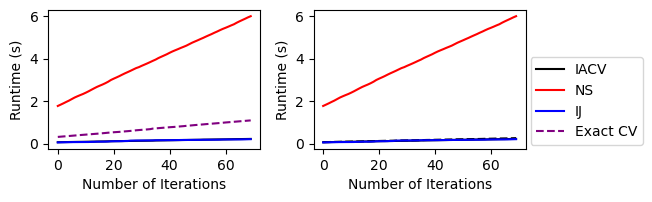

In [8]:
fig, ax = plt.subplots(1, 2)
start_offset = 30
ax[0].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[0].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[0].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[0].plot(runtime['true'][start_offset:], c='purple', label='Exact CV', linestyle='dashed')
ax[0].set_xlabel('Number of Iterations')
ax[0].set_ylabel('Runtime (s)')
#ax[0].legend()
ax[1].plot(runtime['IACV'][start_offset:], c='black', label='IACV')
ax[1].plot(runtime['IACV sparse'][start_offset:], c='black', linestyle='dashed', label='IACV')
ax[1].plot(runtime['IJ'][start_offset:], c='blue', label='IJ')
ax[1].plot(runtime['NS'][start_offset:], c='red', label='NS')
ax[1].set_xlabel('Number of Iterations')
ax[1].set_ylabel('Runtime (s)')
#ax[1].legend()
#ax.legend()
ws = 1.05 # 1.75
hs = 1.65 # 1.25
fig.set_size_inches(w=5.73/ws, h=3.5/hs)
fig.legend(["IACV", "NS", "IJ", "Exact CV"], loc="outside center right", bbox_to_anchor=(1.2, 0.5))
plt.tight_layout()
plt.show()
#plt.savefig('sparse_combined_runtime.pgf', bbox_inches='tight', pad_inches=0)

## markerline, _, _ = plt.stem(theta, label="$\\theta_{IACV}$", linefmt='black', markerfmt='D')
markerline.set_markerfacecolor('none')
plt.stem(theta_star, label="$\\theta^*$")
plt.legend()